In [ ]:
!unzip "/content/drive/MyDrive/archive (3)" -d "/content/drive/MyDrive/cataract"

Archive:  /content/drive/MyDrive/archive (3).zip
  inflating: /content/drive/MyDrive/cataract/processed_images/test/cataract/image_246.png  
  inflating: /content/drive/MyDrive/cataract/processed_images/test/cataract/image_247.png  
  inflating: /content/drive/MyDrive/cataract/processed_images/test/cataract/image_248.png  
  inflating: /content/drive/MyDrive/cataract/processed_images/test/cataract/image_249.png  
  inflating: /content/drive/MyDrive/cataract/processed_images/test/cataract/image_250.png  
  inflating: /content/drive/MyDrive/cataract/processed_images/test/cataract/image_251.png  
  inflating: /content/drive/MyDrive/cataract/processed_images/test/cataract/image_252.png  
  inflating: /content/drive/MyDrive/cataract/processed_images/test/cataract/image_253.png  
  inflating: /content/drive/MyDrive/cataract/processed_images/test/cataract/image_254.png  
  inflating: /content/drive/MyDrive/cataract/processed_images/test/cataract/image_255.png  
  inflating: /content/drive/MyD

In [ ]:
import warnings
warnings.filterwarnings("ignore")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob

In [ ]:
ROOT_DIR="/content/drive/MyDrive/cataract/processed_images"
test_dir="/content/drive/MyDrive/cataract/processed_images/test"
number_of_images={}

for dir in os.listdir(test_dir):
  number_of_images[dir]=len(os.listdir(os.path.join(test_dir,dir)))

In [ ]:
number_of_images.items()

dict_items([('cataract', 61), ('normal', 60)])

In [ ]:
from keras.layers import Conv2D, MaxPool2D,Dropout,Flatten, Dense,BatchNormalization,GlobalAvgPool2D
from keras.models import Sequential
from keras.preprocessing.image import load_img, img_to_array,ImageDataGenerator
import keras

# **CNN SEQUENTIAL MODEL**

In [ ]:
input_shape = (224, 224, 3)

model = Sequential()


model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPool2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))


model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_23 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_24 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 26, 26, 128)      

In [ ]:
image_paths = {
    "train_cataract" : [],
    "train_normal" : [],
    "test_cataract" : [],
    "test_normal" : []
}
for dirname, _, filenames in os.walk('/content/drive/MyDrive/cataract/processed_images'):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        if "train/cataract" in path:
            image_paths["train_cataract"].append(path)
        elif "train/normal" in path:
            image_paths["train_normal"].append(path)
        elif "test/cataract" in path:
            image_paths["test_cataract"].append(path)
        elif "test/normal" in path:
            image_paths["test_normal"].append(path)
len(image_paths["train_normal"])

246

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 32

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/cataract/processed_images/train',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/cataract/processed_images/test',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary'
)

Found 491 images belonging to 2 classes.
Found 121 images belonging to 2 classes.


Epoch 1/10
16/16 [==============================] - 25s 1s/step - loss: 0.7874 - accuracy: 0.6232 - val_loss: 0.4740 - val_accuracy: 0.7521
Epoch 2/10
16/16 [==============================] - 23s 1s/step - loss: 0.4343 - accuracy: 0.8310 - val_loss: 0.4615 - val_accuracy: 0.8182
Epoch 3/10
16/16 [==============================] - 22s 1s/step - loss: 0.3849 - accuracy: 0.8513 - val_loss: 0.3474 - val_accuracy: 0.9008
Epoch 4/10
16/16 [==============================] - 23s 1s/step - loss: 0.2982 - accuracy: 0.8676 - val_loss: 0.3481 - val_accuracy: 0.8760
Epoch 5/10
16/16 [==============================] - 28s 2s/step - loss: 0.2069 - accuracy: 0.9145 - val_loss: 0.3954 - val_accuracy: 0.8760
Epoch 6/10
16/16 [==============================] - 23s 1s/step - loss: 0.1736 - accuracy: 0.9226 - val_loss: 0.3538 - val_accuracy: 0.9174
Epoch 7/10
16/16 [==============================] - 23s 1s/step - loss: 0.1743 - accuracy: 0.9450 - val_loss: 0.3676 - val_accuracy: 0.9091
Epoch 8/10
16/16 [==

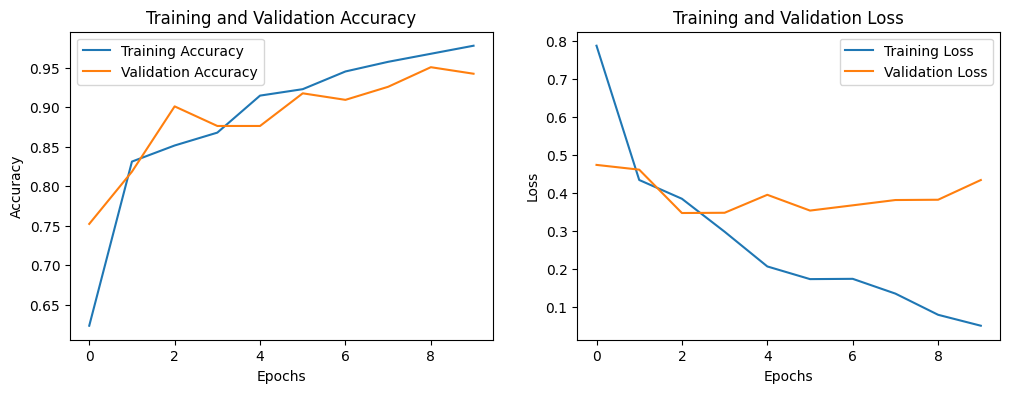

4/4 [==============================] - 5s 1s/step - loss: 0.4342 - accuracy: 0.9421
Test Accuracy: 94.21%


In [ ]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)


test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()


test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


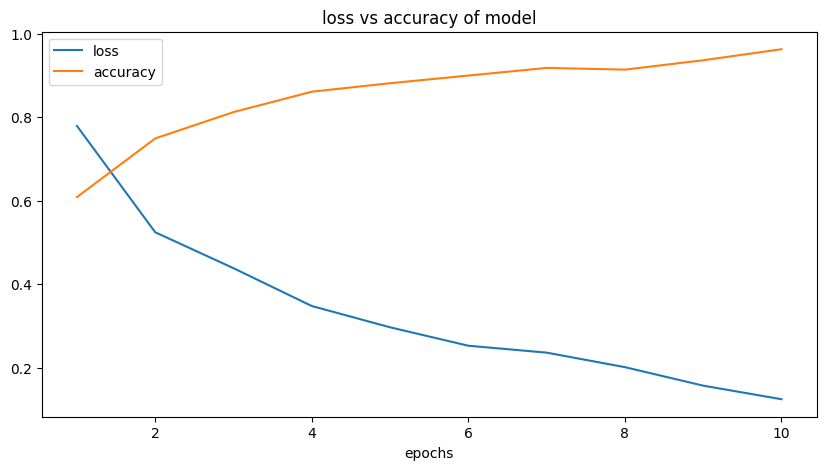

In [ ]:
epochs = range(1, 11)
plt.figure(figsize=(10, 5))
plt.title("loss vs accuracy of model")
plt.plot(epochs, history.history['loss'], label='loss')
plt.plot(epochs, history.history['accuracy'], label='accuracy')
plt.grid()
plt.xlabel("epochs")
plt.grid()
plt.legend()

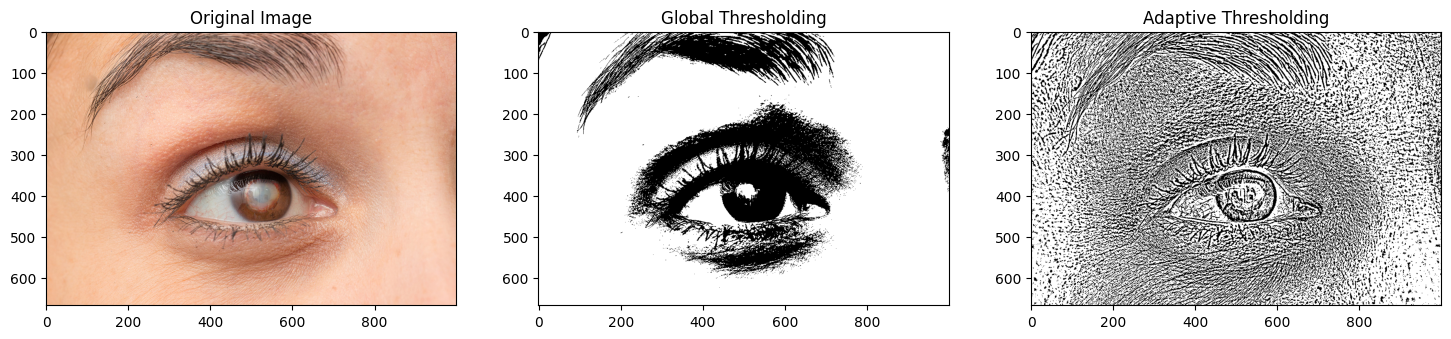

In [ ]:
import cv2
import matplotlib.pyplot as plt

image_path = '/content/drive/MyDrive/cataract/processed_images/train/cataract/image_100.png'
image = cv2.imread(image_path)

thresh_ada = cv2.adaptiveThreshold(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

_, thresh = cv2.threshold(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), 150, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(thresh, cmap='gray')
plt.title('Global Thresholding')

plt.subplot(1, 3, 3)
plt.imshow(thresh_ada, cmap='gray')
plt.title('Adaptive Thresholding')

plt.show()


**EVALUATION**

In [ ]:
tp = tn = fp = fn = 0
for actual, predicted in zip(list(pred_df['actual_class']), list(pred_df['predicted_class'])):
    if actual == 'normal' and predicted == 'normal':
        tp = tp + 1
    elif actual == 'cataract' and predicted == 'cataract':
        tn = tn + 1
    elif actual == 'normal' and predicted == 'cataract':
        fp = fp + 1
    elif actual == 'cataract' and predicted == 'normal':
        fn = fn + 1

In [ ]:
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * precision * recall / (precision + recall)

In [ ]:
evaluation_summary = pd.DataFrame()
evaluation_summary["accuracy"] = [accuracy]
evaluation_summary["precision"] = [precision]
evaluation_summary["recall"] = [recall]
evaluation_summary["f1"] = [f1]

styled_summary = evaluation_summary.style.background_gradient(cmap='viridis').format("{:.2f}")

styled_summary

,accuracy,precision,recall,f1
0,0.94,0.97,0.92,0.94


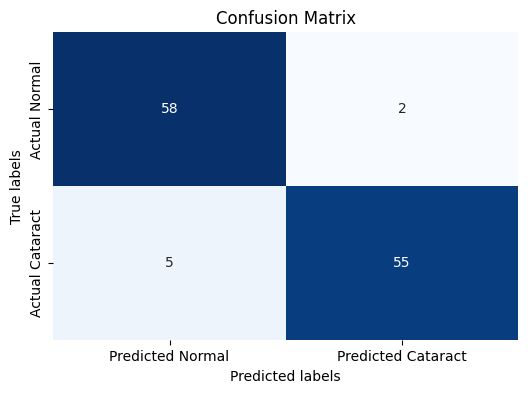

In [ ]:
import seaborn as sns
conf_matrix = [[tp, fp],
               [fn, tn]]

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Normal', 'Predicted Cataract'],
            yticklabels=['Actual Normal', 'Actual Cataract'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from PIL import Image
import numpy as np
path1="/content/NL_006.png"
img = Image.open(path1)
img = img.resize((224, 224))
img = np.array(img)
img = img / 255.0
img = np.expand_dims(img, axis=0)
pred = model.predict(img)
if pred[0] > 0.5:
  print('normal')
else:
  print('cataract')

1/1 [==============================] - 0s 17ms/step
cataract


# **ResNet**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

# Define constants
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
NUM_CLASSES = 2  # cataract and normal

# Define paths to your dataset
train_data_dir = "/content/drive/MyDrive/cataract/processed_images/train"
test_data_dir = "/content/drive/MyDrive/cataract/processed_images/test"

# Data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1.0/255)

# Load and augment data
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

# Load pre-trained ResNet50 model without the top classification layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a fully connected layer
x = Dense(1024, activation='relu')(x)

# Add output layer
predictions = Dense(NUM_CLASSES, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers in the base ResNet50 model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.samples // BATCH_SIZE
)

# Evaluate the model
predictions = model.predict(test_generator)

# Get the predicted class labels
y_pred = np.argmax(predictions, axis=1)

# Get the true class labels
y_true = test_generator.classes

# Print classification report and confusion matrix
print(classification_report(y_true, y_pred))
print(confusion_matrix(y_true, y_pred))


Found 491 images belonging to 2 classes.
Found 121 images belonging to 2 classes.
94765736/94765736 [==============================] - 5s 0us/step
Epoch 1/10
15/15 [==============================] - 36s 2s/step - loss: 0.9716 - accuracy: 0.5229 - val_loss: 0.7368 - val_accuracy: 0.3646
Epoch 2/10
15/15 [==============================] - 27s 2s/step - loss: 0.7115 - accuracy: 0.4989 - val_loss: 0.7302 - val_accuracy: 0.3750
Epoch 3/10
15/15 [==============================] - 27s 2s/step - loss: 0.7624 - accuracy: 0.4641 - val_loss: 1.0171 - val_accuracy: 0.3646
Epoch 4/10
15/15 [==============================] - 27s 2s/step - loss: 0.7226 - accuracy: 0.5447 - val_loss: 0.7273 - val_accuracy: 0.6354
Epoch 5/10
15/15 [==============================] - 27s 2s/step - loss: 0.7397 - accuracy: 0.5534 - val_loss: 0.7516 - val_accuracy: 0.3854
Epoch 6/10
15/15 [==============================] - 27s 2s/step - loss: 0.6589 - accuracy: 0.5839 - val_loss: 0.5967 - val_accuracy: 0.6562
Epoch 7/10
15

# **VGG 16**

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_6 (Flatten)         (None, 25088)             0         
                                                                 
 dense_17 (Dense)            (None, 128)               3211392   
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_18 (Dense)            (None, 1)                 129       
                                                                 
Total params: 17926209 (68.38 MB)
Trainable params: 3211521 (12.25 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________
Epoch 1

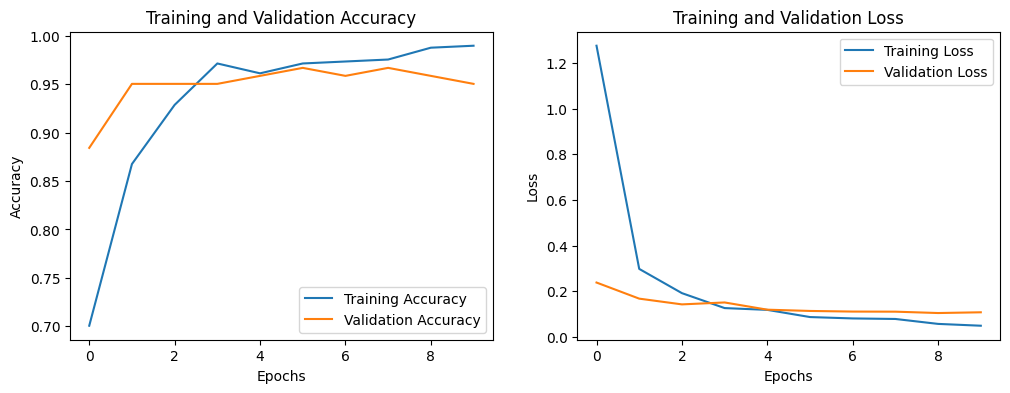

4/4 [==============================] - 5s 1s/step - loss: 0.1076 - accuracy: 0.9504
Test Accuracy: 95.04%


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16
input_shape = (224, 224, 3)


base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

for layer in base_model.layers:
    layer.trainable = False


vgg_model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

vgg_model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


vgg_model.summary()


history = vgg_model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)


plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

test_loss, test_accuracy = vgg_model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


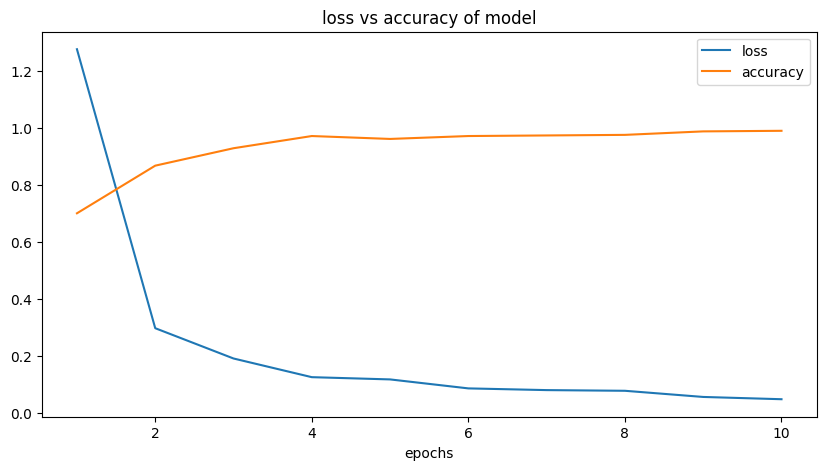

In [ ]:
epochs = range(1, 11)
plt.figure(figsize=(10, 5))
plt.title("loss vs accuracy of model")
plt.plot(epochs, history.history['loss'], label='loss')
plt.plot(epochs, history.history['accuracy'], label='accuracy')
plt.grid()
plt.xlabel("epochs")
plt.grid()
plt.legend()

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score
from sklearn.metrics import classification_report

y_pred = vgg_model.predict(test_generator)
y_pred_classes = np.round(y_pred)


y_true = test_generator.classes

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

class_report = classification_report(y_true, y_pred_classes)

print(class_report)
print("Confusion Matrix:")
print(conf_matrix)

4/4 [==============================] - 7s 2s/step
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        61
           1       0.94      0.97      0.95        60

    accuracy                           0.95       121
   macro avg       0.95      0.95      0.95       121
weighted avg       0.95      0.95      0.95       121

Confusion Matrix:
[[57  4]
 [ 2 58]]


# **MobileNet**

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d_3  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_19 (Dense)            (None, 128)               163968    
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                                 
 dense_20 (Dense)            (None, 1)                 129       
                                                                 
Total params: 2422081 (9.24 MB)
Trainable params: 1640

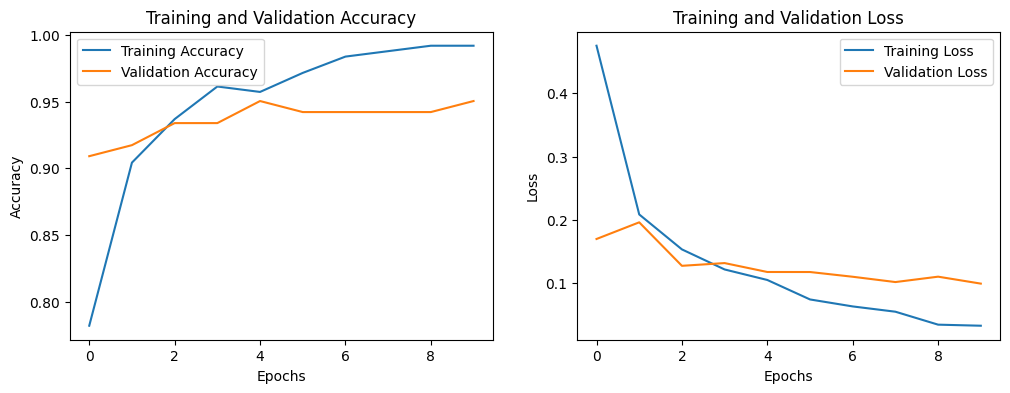

4/4 [==============================] - 5s 1s/step - loss: 0.0987 - accuracy: 0.9504
Test Accuracy: 95.04%


In [ ]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications import MobileNetV2
input_shape = (224, 224, 3)


base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)

for layer in base_model.layers:
    layer.trainable = False

mn_model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


mn_model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


mn_model.summary()

history = mn_model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

# Plot accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()


test_loss, test_accuracy = mn_model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

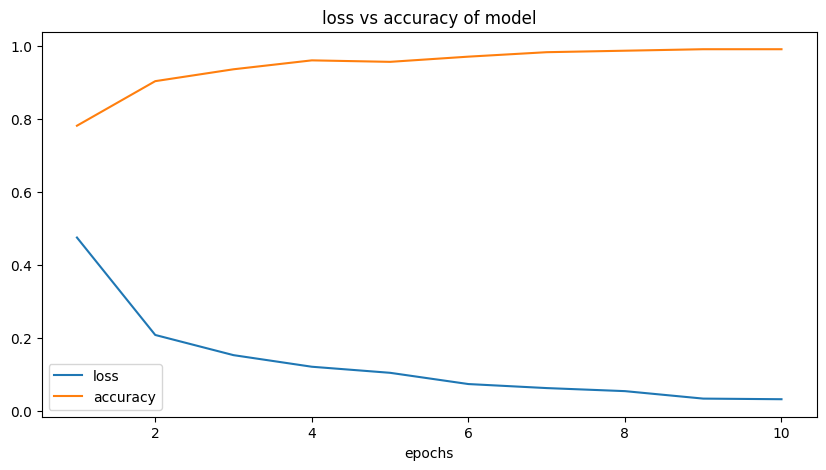

In [ ]:
epochs = range(1, 11)
plt.figure(figsize=(10, 5))
plt.title("loss vs accuracy of model")
plt.plot(epochs, history.history['loss'], label='loss')
plt.plot(epochs, history.history['accuracy'], label='accuracy')
plt.grid()
plt.xlabel("epochs")
plt.grid()
plt.legend()

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score
from sklearn.metrics import classification_report

y_pred = mn_model.predict(test_generator)
y_pred_classes = np.round(y_pred)


y_true = test_generator.classes

conf_matrix = confusion_matrix(y_true, y_pred_classes)

class_report = classification_report(y_true, y_pred_classes)

print(class_report)
print("Confusion Matrix:")
print(conf_matrix)

4/4 [==============================] - 5s 1s/step
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        61
           1       0.94      0.97      0.95        60

    accuracy                           0.95       121
   macro avg       0.95      0.95      0.95       121
weighted avg       0.95      0.95      0.95       121

Confusion Matrix:
[[57  4]
 [ 2 58]]


# **SAMPLE RESULTS**

1/1 [==============================] - 0s 266ms/step
actual class : normal
predicted class : normal


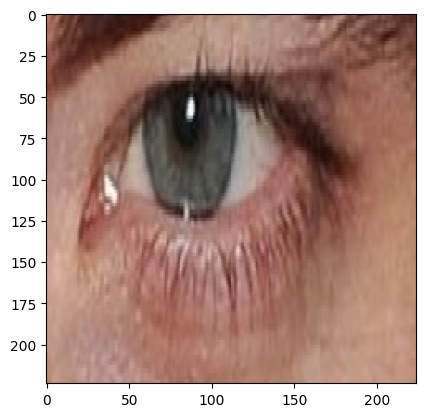

In [ ]:
path = "/content/drive/MyDrive/cataract/processed_images/train/normal/image_105.png"
img=load_img(path,target_size=(224,224))
plt.imshow(np.array(img))
img = img.resize((224, 224))
img = np.array(img) / 255.0
img = np.expand_dims(img, axis=0)

pred = model.predict(img)
print("actual class : normal")
print(f"predicted class : {'normal' if pred[0] > 0.5 else 'cataract'}")

1/1 [==============================] - 0s 17ms/step
actual class : cataract
predicted class : cataract


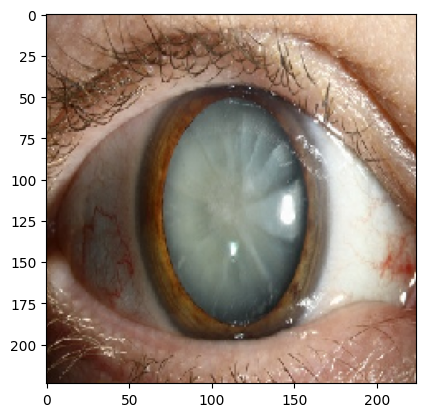

In [ ]:
path = "/content/drive/MyDrive/cataract/processed_images/test/cataract/image_249.png"
img=load_img(path,target_size=(224,224))
plt.imshow(np.array(img))
img = img.resize((224, 224))
img = np.array(img) / 255.0
img = np.expand_dims(img, axis=0)
pred = model.predict(img)
print("actual class : cataract")
print(f"predicted class : {'normal' if pred[0] > 0.5 else 'cataract'}")

1/1 [==============================] - 0s 18ms/step
actual class : cataract
predicted class : cataract


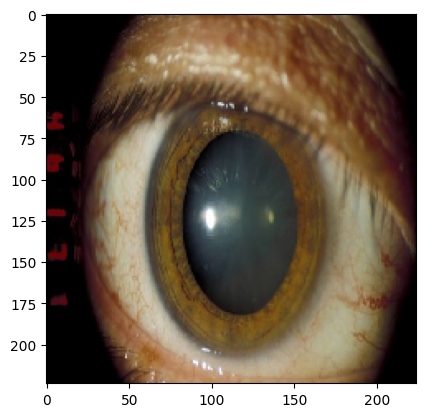

In [ ]:
path = "/content/drive/MyDrive/cataract/processed_images/test/cataract/image_259.png"
img=load_img(path,target_size=(224,224))
plt.imshow(np.array(img))
img = img.resize((224, 224))
img = np.array(img) / 255.0
img = np.expand_dims(img, axis=0)

pred = model.predict(img)
print("actual class : cataract")
print(f"predicted class : {'normal' if pred[0] > 0.5 else 'cataract'}")

In [ ]:
from PIL import Image

def _predict(model, path):
    img = Image.open(path)
    img = img.resize((224, 224))
    img = np.array(img)
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    pred = model.predict(img)
    if pred[0] > 0.5:
        return 'normal'
    else:
        return 'cataract'


In [ ]:
def evaluate(model, normal_path, cataract_path):
    normal_pred = []
    cataract_pred = []
    for normal, cataract in zip(normal_path, cataract_path):
        res_cataract = _predict(model, cataract)
        cataract_pred.append(res_cataract)

        res_normal = _predict(model, normal)
        normal_pred.append(res_normal)

    return normal_pred, cataract_pred

In [ ]:
both_size = min(len(image_paths["test_normal"]), len(image_paths["test_cataract"]))
cataract_test_path = image_paths["test_cataract"][:both_size]
normal_test_path = image_paths["test_normal"][:both_size]
normal_pred, cataract_pred = evaluate(model, image_paths["test_normal"], image_paths["test_cataract"])

1/1 [==============================] - 0s 26ms/step


In [ ]:
import pandas as pd
pred_df = pd.DataFrame()
pred_df["relative_path"] = normal_test_path + cataract_test_path
pred_df["actual_class"] = ["normal"]*len(normal_test_path) + ["cataract"]*len(cataract_test_path)
pred_df["predicted_class"] = normal_pred + cataract_pred

In [ ]:
pred_df.head(20)

,relative_path,actual_class,predicted_class
0,/content/drive/MyDrive/cataract/processed_imag...,normal,normal
1,/content/drive/MyDrive/cataract/processed_imag...,normal,normal
2,/content/drive/MyDrive/cataract/processed_imag...,normal,normal
3,/content/drive/MyDrive/cataract/processed_imag...,normal,normal
4,/content/drive/MyDrive/cataract/processed_imag...,normal,normal
5,/content/drive/MyDrive/cataract/processed_imag...,normal,normal
6,/content/drive/MyDrive/cataract/processed_imag...,normal,normal
7,/content/drive/MyDrive/cataract/processed_imag...,normal,normal
8,/content/drive/MyDrive/cataract/processed_imag...,normal,normal
9,/content/drive/MyDrive/cataract/processed_imag...,normal,normal


In [ ]:
pred_df.tail(20)

,relative_path,actual_class,predicted_class
100,/content/drive/MyDrive/cataract/processed_imag...,cataract,cataract
101,/content/drive/MyDrive/cataract/processed_imag...,cataract,cataract
102,/content/drive/MyDrive/cataract/processed_imag...,cataract,cataract
103,/content/drive/MyDrive/cataract/processed_imag...,cataract,cataract
104,/content/drive/MyDrive/cataract/processed_imag...,cataract,cataract
105,/content/drive/MyDrive/cataract/processed_imag...,cataract,cataract
106,/content/drive/MyDrive/cataract/processed_imag...,cataract,cataract
107,/content/drive/MyDrive/cataract/processed_imag...,cataract,cataract
108,/content/drive/MyDrive/cataract/processed_imag...,cataract,cataract
109,/content/drive/MyDrive/cataract/processed_imag...,cataract,cataract
